# Rejection Sampling for Generating a Normal Distribution

    
In this notebook, I Intend to explore the use of rejection sampling to generate a normal distribution using a curve that is a function of |5-X|.
    
## Introduction to Rejection Sampling
    
Rejection sampling is a technique for generating random numbers from a probability distribution. The basic idea is to sample from a simpler distribution and then accept or reject each sample based on whether it falls under the target distribution. Rejection sampling is practical when the target distribution is difficult to sample directly, but we can define a function proportional to the target distribution.
    
## Generating a Normal Distribution using Rejection Sampling
    
I will use rejection sampling to generate a normal distribution. We will define a curve that is a function of |5-X| and use this curve to sample from a uniform distribution. We will then accept or reject each sample based on whether it falls under the target distribution. Let's get started!

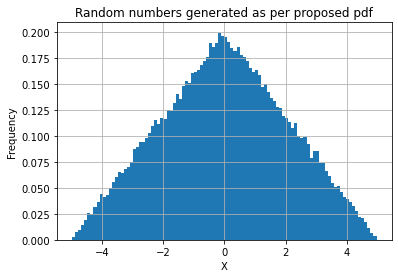

In [6]:
import numpy as np
import matplotlib.pyplot as plt

a = np.random.uniform(0,1,100000) # generating some random numbers as per the uniform distribution
b = np.random.uniform(0,1,100000)

prop = []
for i in range(len(a)):
    if a[i]<=0.5:
        prop.append(5*(1-np.sqrt(1-b[i]))) #appending the inverse transform of the proposed function
        
    else:
        prop.append(-5*(1-np.sqrt(1-b[i]))) #appending the inverse transform of the proposed function


plt.hist(prop,bins=100,density = True)
plt.title('Random numbers generated as per proposed pdf')
plt.xlabel('X')
plt.ylabel("Frequency")
plt.grid()
plt.show()

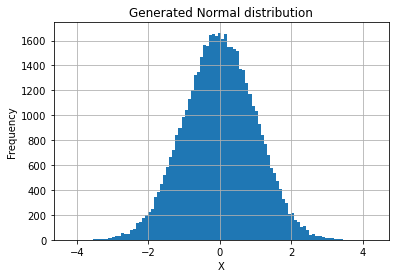

In [8]:
prop = np.array(prop)

def norm(x):
    """Returns - N(0,1) for a given x"""
    
    return (2*np.pi)**-0.5 * np.exp(-x**2/2)

def propfunc(x):
    """Returns a probability density proportional to |5-x|, where -5<x<5"""
    
    return 25**-1*(5-abs(x))

vprop = np.vectorize(propfunc) 
vnorm = np.vectorize(norm)

alpha = np.amax(vnorm(prop) / vprop(prop))
f = vnorm(prop)
t = vprop(prop)

c = np.random.uniform(0, alpha * t, size=100000)
accept = prop[c <= f] #Rejection sampling happens here

plt.hist(accept, bins=100)
plt.title('Generated Normal distribution')
plt.xlabel('X')
plt.ylabel('Frequency')
plt.grid()
plt.show()

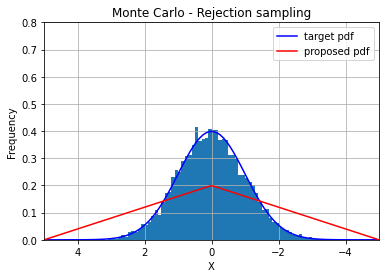

In [9]:
#Generating an animation graph 

import matplotlib.animation as anim
import numpy as np
import warnings

warnings.filterwarnings("ignore")


fig, ax = plt.subplots()
ax.axis([5, -5,0,0.8])

# Plot the histogram of the data
# for i in range(len(data))
n, bins, patches = ax.hist([], bins=100,  range = (-5,5),density = True)
ax.plot(np.linspace(-5,5,100),(vnorm(np.linspace(-5,5,100))), color = 'b', label = 'target pdf')
ax.plot(np.linspace(-5,5,100),(vprop(np.linspace(-5,5,100))), color = 'r', label = 'proposed pdf')
ax.legend(loc="upper right")
ax.set_title('Monte Carlo - Rejection sampling')
ax.set_ylabel('Frequency')
ax.set_xlabel('X')
ax.grid()

def animate(i):

    ndata = accept[:100*i]
    n,_ = np.histogram(ndata ,bins = 100, range = (-5,5), density = True)
    for j in range(len(patches)):
        patches[j].set_height(n[j])

ani = anim.FuncAnimation(fig, animate, frames=100, repeat=False)

from IPython.display import HTML
HTML(ani.to_jshtml())

